### set folder_name and day session to analyze

In [79]:
name = 'ANB2'
session = '20231208_d21'

### imports

In [80]:
from scipy import io
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import statistics
import re
import glob
import scipy.signal as signal
import pickle

from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.align_times import get_leverdata_indices
from preprocess_leverdata.get_trial_frequencies import get_trial_frequencies
from preprocess_leverdata.butterworth_filter_leverdata import butterworth_filter_leverdata
from preprocess_leverdata.rescale_leverdata import rescale_leverdata
from preprocess_leverdata.view_processed_trial_FFT import view_processed_trial_FFT
from preprocess_leverdata.calculate_leverdata_sample_times import calculate_leverdata_sample_times

### Setup folders and matfiles

In [81]:
tone_discriminiation_matfile = '../Data_Copy/ToneDiscrimination/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)

output_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
leverdata_matfile = "../Data_Copy/LeverData/"+name+"/LeverData_"+name+"_"+session+".mat"

respMTX shape: (173, 7)
MTXTrialType shape: (1000, 5)
number of trials: 173


In [82]:
open(leverdata_matfile)

<_io.TextIOWrapper name='../Data_Copy/LeverData/ANB2/LeverData_ANB2_20231208_d21.mat' mode='r' encoding='UTF-8'>

For mac:

In [83]:
!mkdir {output_folder}

mkdir: ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231208_d21/: File exists


For windows:

In [84]:
!mkdir "{output_folder}"

mkdir: ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231208_d21/: File exists


preview trials

In [85]:
np.set_printoptions(suppress = True,
   formatter = {'float_kind':'{:f}'.format})
print(np.hstack((respMTX[1:101, 0:1]-respMTX[0:100, 0:1], np.array([np.linspace(0, 99, 100)]).transpose())))

[[15.260536 0.000000]
 [15.051059 1.000000]
 [14.922464 2.000000]
 [15.206401 3.000000]
 [29.407744 4.000000]
 [16.856925 5.000000]
 [22.885945 6.000000]
 [17.994004 7.000000]
 [38.230387 8.000000]
 [15.168046 9.000000]
 [14.974093 10.000000]
 [14.958674 11.000000]
 [38.381831 12.000000]
 [14.979692 13.000000]
 [14.767150 14.000000]
 [9.312409 15.000000]
 [15.331144 16.000000]
 [14.962061 17.000000]
 [14.957778 18.000000]
 [14.862535 19.000000]
 [14.899938 20.000000]
 [14.978841 21.000000]
 [15.062871 22.000000]
 [15.176822 23.000000]
 [15.245669 24.000000]
 [14.680539 25.000000]
 [15.264375 26.000000]
 [36.629729 27.000000]
 [5.800898 28.000000]
 [30.051229 29.000000]
 [11.439267 30.000000]
 [6.509844 31.000000]
 [18.596276 32.000000]
 [14.553941 33.000000]
 [15.508103 34.000000]
 [5.187440 35.000000]
 [15.159797 36.000000]
 [15.090131 37.000000]
 [15.103286 38.000000]
 [8.574458 39.000000]
 [15.088518 40.000000]
 [15.076949 41.000000]
 [15.402086 42.000000]
 [18.160788 43.000000]
 [1

### Run leverdata2binary.cpp to create binary files for each trial from `lever_data` in the LeverData .mat file

In [86]:
!./preprocess_leverdata/leverdata2binary {output_folder} {leverdata_matfile} 27027

leverdata from .mat size: 72000000,72000000
leverdata from .mat rank: 2
leverdata vector size: 72000000
leverdata vector with unused rows taken out size: 20762975
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231208_d21/full.bin
finished a trialITI: 116802 index:0 trialITI length: 89775 samples = ~15s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231208_d21/trial0.bin
finished a trialITI: 205341 index:1 trialITI length: 88539 samples = ~15s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231208_d21/trial1.bin
finished a trialITI: 293122 index:2 trialITI length: 87781 samples = ~14s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231208_d21/trial2.bin
finished a trialITI: 382571 index:3 trialITI length: 89449 samples = ~15s
vector saved to .bin file ../Data_Copy/AnalysisData/ANB2/PreprocessLeverData_ANB2_20231208_d21/trial3.bin
finished a tr

change `num_trials` if seems like `lever_data` stopped before behavior (if total trials detected is less than `num_trials` from `respMTX`)

In [87]:
num_trials = 173

### Look at sampling rates for the `lever_data`

In [88]:
dts, trial_frequencies = get_trial_frequencies(num_trials, respMTX, output_folder)

Trial  0
Duration in MATLAB seconds from respMTX:  15.260535699999998
Number of leverdata samples:  89775
Estimated freq:  5882.8210073909795
Trial  1
Duration in MATLAB seconds from respMTX:  15.051058600000001
Number of leverdata samples:  88539
Estimated freq:  5882.576259453272
Trial  2
Duration in MATLAB seconds from respMTX:  14.922464399999999
Number of leverdata samples:  87781
Estimated freq:  5882.47340700642
Trial  3
Duration in MATLAB seconds from respMTX:  15.206401400000004
Number of leverdata samples:  89449
Estimated freq:  5882.325321229517
Trial  4
Duration in MATLAB seconds from respMTX:  29.40774379999999
Number of leverdata samples:  172986
Estimated freq:  5882.32817779105
Trial  5
Duration in MATLAB seconds from respMTX:  16.856925200000006
Number of leverdata samples:  99159
Estimated freq:  5882.389511937798
Trial  6
Duration in MATLAB seconds from respMTX:  22.88594520000001
Number of leverdata samples:  134624
Estimated freq:  5882.387588693516
Trial  7
Durat

Number of leverdata samples:  88605
Estimated freq:  5882.344857411535
Trial  23
Duration in MATLAB seconds from respMTX:  15.176821599999982
Number of leverdata samples:  89275
Estimated freq:  5882.325189880344
Trial  24
Duration in MATLAB seconds from respMTX:  15.245668899999998
Number of leverdata samples:  89681
Estimated freq:  5882.3919493620915
Trial  25
Duration in MATLAB seconds from respMTX:  14.680538500000011
Number of leverdata samples:  86357
Estimated freq:  5882.413645793711
Trial  26
Duration in MATLAB seconds from respMTX:  15.26437450000003
Number of leverdata samples:  89789
Estimated freq:  5882.258719477815
Trial  27
Duration in MATLAB seconds from respMTX:  36.62972909999996
Number of leverdata samples:  215470
Estimated freq:  5882.380385936302
Trial  28
Duration in MATLAB seconds from respMTX:  5.800898200000006
Number of leverdata samples:  34123
Estimated freq:  5882.364906869071
Trial  29
Duration in MATLAB seconds from respMTX:  30.0512291
Number of lever

So if estimated frequencies are not all around 5882 Hz, then trials probably aren't aligned. Make sure files are correct, and try increasing the skipped samples in for the C++ trial detection program. Also make sure the statistics are all between 4500 and 5900.

### low pass Butterworth filter `lever_data` with a cutoff frequency of 40 Hz

Assuming electrical noise will be around 60 Hz

In [89]:
cutoff_frequency = 40
butterworth_filter_leverdata(output_folder, num_trials, cutoff_frequency)

### Rescale the filtered_lever_data to 0-5V from 0-1023 analogRead values

In [90]:
rescale_leverdata(output_folder, num_trials)

### Calculate sample time values for each sample based on trial start times

In [91]:
calculate_leverdata_sample_times(output_folder, respMTX, num_trials)

### Get tone and leverpress sample indicies

In [92]:
get_leverdata_indices(output_folder, respMTX, num_trials)

### Check the FFT power spectrum for one of the trials

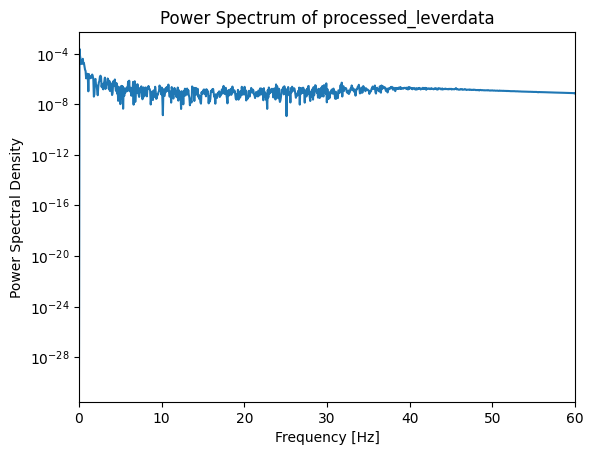

In [93]:
# set which trial to look at
trial_index = 10
view_processed_trial_FFT(trial_index, output_folder)